# Clasificación con Máquina De Véctores de Soporte y Redes de Neuronas

<center> Alumno: <b>Eduardo Reyero Ibáñez</b> </center>

## 1. Importar datos

In [3]:
# Librerias
import pandas as pd
import numpy as np
import missingno

In [4]:
# Importar dataset
mobile_df = pd.read_csv('datasets_train.csv')
print('Dimensiones del dataset: {}'.format(mobile_df.shape))
print ('Observamos las primeras lineas:')
mobile_df.head()

Dimensiones del dataset: (2000, 21)
Observamos las primeras lineas:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2. Análisis descriptivo de los datos

### 2.1 Variables numéricas

In [5]:
# Obtener num de elementos, media, desv típica, max, min y cuartiles
stats_df = mobile_df.describe(include)
# Obtener y añadir la mediana
median = pd.DataFrame(mobile_df.median())
median = median.transpose()
median.rename(index = {0:'median'},inplace = True)
stats_df = stats_df.append(median).transpose() 
stats_df

,count,mean,std,min,25%,50%,75%,max,median
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0,1226.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0,0.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0,1.5
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0,3.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0,32.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0,0.5
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0,141.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0,4.0


### 2.2 Variables categóricas

Podemos observar en la siguiente celda que no hay variables categóricas en el dataset

In [6]:
mobile_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Sin embargo, hay ciertas variables que aunque se han introducido en el dataset por su valor binario 0 o 1, se tratan de variables categóricas con dos opciones cada una (lo tienen o no lo tienen). Dichas variables son:  
- blue  
- dual_sim  
- four_g  
- three_g  
- touch_screen  
- wifi  

Por tanto evaluaremos la frecuencia de los datos en estas categorías considerando el valor 1 como que el telefono cuenta con la característica y el valor 0 como que no cuenta con ella. Para ello expresaremos el porcentaje de cada tipo de dato:

In [7]:
# Hallamos el porcentaje de 1 (lo tiene) y 0 (no lo tiene)
print('\033[1m'+'Porcentaje de las variables dentro de las categorías (0 no lo tienen y 1 lo tienen): '+'\033[0m')
var_cat = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for col_name in mobile_df[var_cat].columns:
    print('Variable: ' + col_name)
    print(100*mobile_df[col_name].value_counts()/len(mobile_df[col_name]))
    print('-------------------------------')

Porcentaje de las variables dentro de las categorías (0 no lo tienen y 1 lo tienen): 
Variable: blue
0    50.5
1    49.5
Name: blue, dtype: float64
-------------------------------
Variable: dual_sim
1    50.95
0    49.05
Name: dual_sim, dtype: float64
-------------------------------
Variable: four_g
1    52.15
0    47.85
Name: four_g, dtype: float64
-------------------------------
Variable: three_g
1    76.15
0    23.85
Name: three_g, dtype: float64
-------------------------------
Variable: touch_screen
1    50.3
0    49.7
Name: touch_screen, dtype: float64
-------------------------------
Variable: wifi
1    50.7
0    49.3
Name: wifi, dtype: float64
-------------------------------


Se puede observar como en torno al 50% de los móviles poseen bluetooth, tarjeta sim dual, pantalla tactil, 4G y wifi. Donde mayor variabilidad se ve en los datos es en la presencia de 3G, el cual está incluido en el 76.15% de los móviles.

### 2.3 Matriz de correlaciones y análisis de los resultados

In [8]:
var_num = mobile_df.select_dtypes(include = ['int64','float64']).reset_index(drop = True)
corr_mat = var_num.corr()
corr_mat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


A continuación se mostrarán las variables más correlacionadas con price_range

In [9]:
# Encontramos variables con mayor correlación
print('\033[1m'+'Listado de las variables con mayor influencia en price_range junto a su coeficiente de correlación:'+'\033[0m')
important_var_list = []
for i in range(0,len(corr_mat)):
    if corr_mat['price_range'][i] > 0.2:
        print('{} {}'.format(corr_mat.index[i],corr_mat.loc[corr_mat.index[i],'price_range']))
        important_var_list.append(corr_mat.index[i])

Listado de las variables con mayor influencia en price_range junto a su coeficiente de correlación:
battery_power 0.20072261211373094
ram 0.9170457362649922
price_range 1.0


Puede verse que la unica variable que supera un 0.75 de correlación con el rango de precios es la <b>memoria RAM</b>, concretamente con un 0.91. Dicho resultado tiene bastante lógica pues la cantidad de memoria es uno de los factores que más encarece el precio de un movil.  
Otra variable que presenta cierta correlación con el precio, aunque mucho menor que la RAM, es la <b>batería</b> del telefono, la cual se situa en torno al 0.2

## 3. Tratamiento de missing

Para evaluar los datos que faltan en el DataFrame, a continuación se analizarán que columnas tienen elementos NaN. Para todas ellas se especificará el nombre de la columna, el número de elementos que faltan y a que índice de columna corresponden dichas columnas con elementos faltantes en el DataFrame original.

In [10]:
# Lista con los missing de cada columna
missing = mobile_df.isna().sum()
# Creamos dataframe con columnas y missing values
missing_df = pd.DataFrame([mobile_df.columns,missing]).transpose()
# Nos quedamos solo con  las columnas que tengan missing
for index in missing_df.index:
    if missing_df.iloc[index,1] > 0:
        print('Columna: {}, N of NaN: {}, Index in Dataframe: {}'.format(missing_df.iloc[index,0],missing_df.iloc[index,1],index))

Como puede verse no se ha obtenido ningún resultado, lo que indica que no hay elementos NaN en el DataSet. Para hacerlo más visual, se mostrarán los datos con la libreria missingno, con la cual podemos ver visualmente si hay valores faltantes.

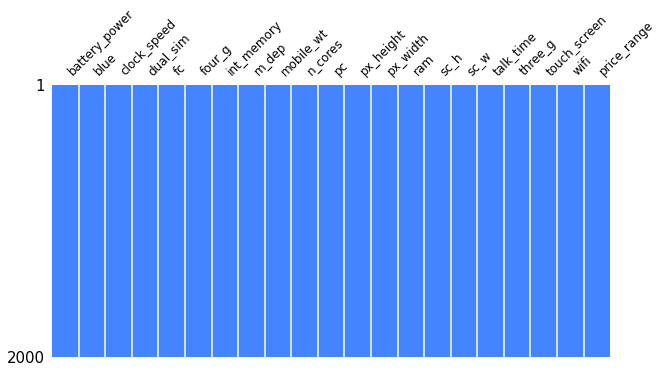

In [11]:
missingno.matrix(mobile_df,sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

Puede verse como no aparecen huecos en la representación, lo que indica que el dataset se encuentra completo y no hay valores faltantes.

## 4. Aplicación de Maquinas de Vectores de Soporte

In [12]:
# Imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
%matplotlib inline 
import matplotlib.pyplot as plt
import itertools

En este apartado se aplicará el método de Maquinas de Vectores de Soporte para entrenar el clasificador. Hay que destacar que a diferencia de con método de redes neuronales, no se normalizará el dataset a no ser que los resultados obtenidos sean deficientes. Esto se debe, en parte, para evitar limitar el efecto que tienen variables con alto valor como la memoria RAM, la cual esta muy correlacionada con el precio.

### 4.1 División del dataset

En primer lugar se dividirá el dataset en los subconjuntos de entrenamiento y test.

In [13]:
cols = list(mobile_df.columns[0:len(mobile_df.columns)-1])
X = np.asarray(mobile_df[cols].values)
Y = np.asarray(mobile_df['price_range'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print ('Set de entrenamiento:', X_train.shape,  Y_train.shape)
print ('Set de test:', X_test.shape,  Y_test.shape)

Set de entrenamiento: (1600, 20) (1600,)
Set de test: (400, 20) (400,)


### 4.2 Comparación de diferentes funciones de kernel

A continuación aplicaremos el algorimo. Este posee diferentes funciones de kernel:  

    1.Linear  
    2.Polynomial  
    3.Radial basis function (RBF)  
    4.Sigmoid  
   
Se realizará el entrenamiento del modelo utilizando las cuatro opciones de función y posteriormente se compararan los resultados en función de las metricas obtenidas. De esta forma se seleccionará para el método SVM el mejor kernel para esta actividad.     

In [14]:
# Función de kernel lineal
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train,Y_train)
# Función de kernel polinómica
svm_poly = svm.SVC(kernel = 'poly')
svm_poly.fit(X_train,Y_train)
# Función de kernel RBF
svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(X_train,Y_train)
# Función de kernel sigmoide
svm_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_sigmoid.fit(X_train,Y_train)

SVC(kernel='sigmoid')

Una vez entrenados los modelos procedemos a realizar las predicciones con el set de test:

In [15]:
# Función de kernel lineal
yhat_linear = svm_linear.predict(X_test)
# Función de kernel polinómica
yhat_poly = svm_poly.predict(X_test)
# Función de kernel RBF
yhat_rbf = svm_rbf.predict(X_test)
# Función de kernel sigmoide
yhat_sigmoid = svm_sigmoid.predict(X_test)

### 4.3 Evaluación de los modelos entrenados con diferentes kernel

Una vez realizadas las predicciones se pasará a evaluar los modelos entrenados. Para la evaluación se mostrará la matriz de confusión de cada modelo entrenado y se analizarán los resultados utilizando diversas metricas.

In [16]:
# Función para imprimir la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    '''

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

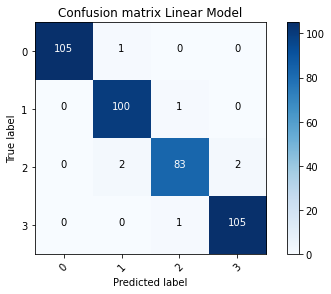

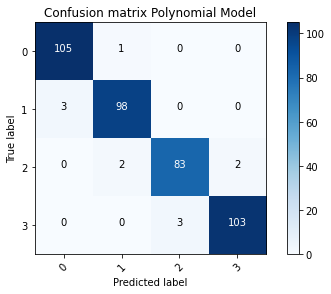

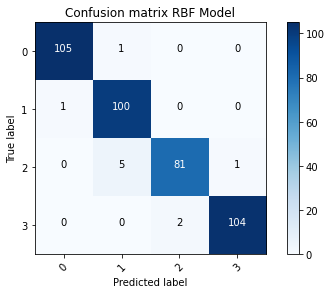

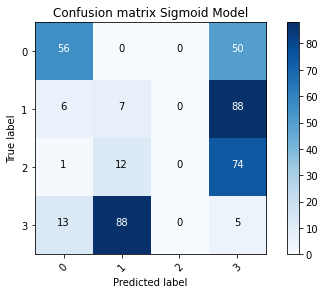

In [17]:
# Matrices de confusión para cada modelo
# Lineal
conf_matrix_linear = confusion_matrix(Y_test,yhat_linear,labels = [0,1,2,3])
plt.figure()
plot_confusion_matrix(conf_matrix_linear, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix Linear Model')
# Polinómico
conf_matrix_poly = confusion_matrix(Y_test,yhat_poly,labels = [0,1,2,3])
plt.figure()
plot_confusion_matrix(conf_matrix_poly, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix Polynomial Model')
# RBF
conf_matrix_rbf = confusion_matrix(Y_test,yhat_rbf,labels = [0,1,2,3])
plt.figure()
plot_confusion_matrix(conf_matrix_rbf, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix RBF Model')
# Sigmoide
conf_matrix_sigmoid = confusion_matrix(Y_test,yhat_sigmoid,labels = [0,1,2,3])
plt.figure()
plot_confusion_matrix(conf_matrix_sigmoid, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix Sigmoid Model')

In [22]:
def calculate_metrics(real, predicted):
    print("Accuracy: {:.4f}".format(accuracy_score(real, predicted)))
    print("Precision: {:.4f}".format(precision_score(real, predicted,average = 'weighted')))
    print("Recall: {:.4f}".format(recall_score(real, predicted,average = 'weighted')))
    print("F1: {:.4f}".format(f1_score(real, predicted,average = 'weighted',labels=np.unique(predicted))))

In [23]:
#Metricas para cada modelo
#Lineal
print('---------------------------------------')
print('Modelo Lineal')
calculate_metrics(Y_test,yhat_linear)
print('---------------------------------------')
#Polinómico
print('Modelo Polinómico')
calculate_metrics(Y_test,yhat_poly)
print('---------------------------------------')
#RBF
print('Modelo RBF')
calculate_metrics(Y_test,yhat_rbf)
print('---------------------------------------')
#Sigmoide
print('Modelo Sigmoide')
calculate_metrics(Y_test,yhat_sigmoid)
print('---------------------------------------')

---------------------------------------
Modelo Lineal
Accuracy: 0.9825
Precision: 0.9826
Recall: 0.9825
F1: 0.9825
---------------------------------------
Modelo Polinómico
Accuracy: 0.9725
Precision: 0.9725
Recall: 0.9725
F1: 0.9725
---------------------------------------
Modelo RBF
Accuracy: 0.9750
Precision: 0.9754
Recall: 0.9750
F1: 0.9750
---------------------------------------
Modelo Sigmoide
Accuracy: 0.1700
Precision: 0.2179
Recall: 0.1700
F1: 0.2406
---------------------------------------


Puede verse como el mejor resultado se obtiene con la <b>función lineal de kernel</b>. En el caso de la función polinómica y RBF también se obtienen buenos resultados. Sin embargo, utilizando la función sigmoide para el kernel el resultado obtenido es mucho peor que con las otras funciones.  
Por tanto, se elegirá el modelo con kernel lineal y se procederá a realizar validación cruzada. En concreto se utilizará el metodo k-fold con un valor de k = 5. Con ello pretendemos ver la influencia que la division en subconjuntos de entrenamiento y test tiene en los resultados obtenidos.

### 4.4 Entrenamiento con kernel lineal utilizando validación cruzada K-fold

In [18]:
# Entrenamos y evaluamos el modelo con SVM utilizando validación cruzada
cv = KFold(n_splits=5, shuffle=False)
SVM_model = svm.SVC(kernel = 'linear')
scores = cross_val_score(SVM_model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

In [19]:
# Imprimimos la accuracy obtenida
print('Accuracy:  %.3f(mean) (%.3f)(std)' % (np.mean(scores), np.std(scores)))

Accuracy:  0.975(mean) (0.004)(std)


La accuracy media obtenida para los 5 modelos entrenados es de 0.97 y su desviación típica de 0.004
Puede verse que utilizando el método de validación cruzada la media de la accuracy baja muy poco respecto a la obtenida para una división simple del dataset. Sin embargo la desviación tipica presentada al utilizar diferentes combinaciones de dataset es mínima, por lo que se asume que se trata de un dataset bastante homogeneo en sus valores, y de cara a futuras comparaciones con otros métodos podemos utilizar una división simple del dataset.

## 5. Aplicación de Redes de Neuronas

In [20]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

### 5.1 Normalización y aplicación de one hot encoding

En primer lugar se procederá a normalizar las variables del dataset para favorecer el entrenamiento de la red neuronal. En el caso de la variable dependiente price_range se le aplicará la técnica de one hot encoding para representarlo como un vector binario.

In [21]:
# Normalización de las variables independientes del dataframe usando el MinMaxScaler para que estén entre 0 y 1
# Obtenemos las variables independientes del dataframe
cols = list(mobile_df.columns[0:len(mobile_df.columns)-1])
indp_vars = np.asarray(mobile_df[cols].values)
# Normalizamos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(indp_vars)

In [22]:
# Aplicación de one hot encoding para la variable dependiente (la cual debe estar como entero)
# Extraemos los one hot encoded de la variable dependiente
price_range_ohe = to_categorical(mobile_df['price_range'],dtype = 'int32')

### 5.2 Arquitectura de la NN y entrenamiento

Una vez normalizado el dataset y aplicado el one hot encoding a la variable dependiente, se procede a separar el dataset en lo subconjuntos de test y entrenamiento.

In [23]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_scaled, price_range_ohe, test_size = 0.2, random_state = 4)

A continuación se definirá el modelo de la red neuronal que se utilizará para el problema de clasificación. Para ello se utilizará la libreria Keras.

In [24]:
# Define Keras model
model_nn = Sequential()
model_nn.add(Dense(32, input_dim = 20, activation = 'relu'))
model_nn.add(Dense(20, activation = 'relu'))
model_nn.add(Dense(4, activation = 'sigmoid'))
# Compile Keras model
model_nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Puede verse que se ha utilizado un modelo con dos capas ocultas con funciones de activación relu y una función de activación sigmoide para la capa de salida. Para la función de coste se ha usado la binary_crossentroy y el optimizador usado es el adam.
Una vez definida la arquitectura se procede a entrenar el modelo con el dataset de entrenamiento. Para ello se entrenará durante 40 épocas con un tamaño de lotes de 4.

In [25]:
# Fit Keras model on the dataset
model_nn.fit(X_train1,Y_train1,epochs = 40, batch_size = 4)

Epoch 1/40
400/400 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.3519
Epoch 2/40
400/400 [==============================] - 1s 1ms/step - loss: 0.4362 - accuracy: 0.5938
Epoch 3/40
400/400 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.7444
Epoch 4/40
400/400 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.7944
Epoch 5/40
400/400 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8256
Epoch 6/40
400/400 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.8694
Epoch 7/40
400/400 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.8775
Epoch 8/40
400/400 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.9013
Epoch 9/40
400/400 [==============================] - 0s 982us/step - loss: 0.1592 - accuracy: 0.9075
Epoch 10/40
400/400 [==============================] - 0s 980us/step - loss: 0.1428 - accuracy: 0.

### 5.3 Evaluación del modelo

Una vez entrenado se pasará a evaluar el modelo hallado utilizando el dataset de test.

In [26]:
predictions = model_nn.predict(X_test1)

Una vez realizada la predicción se procedera a calcular la matriz de confusión y otras metricas para evaluar el resultado obtenido

En primer lugar se deshace el one hot encoded de las variables predecidas y también de la variable dependiente del dataset de test para poder compararlas:

In [27]:
# Obtenemos el rango con mayor probabilidad
predicted_price_range = []
Y_test_price_range = []
for i in range(len(predictions)):
    predicted_price_range.append(np.argmax(predictions[i]))
    Y_test_price_range.append(np.argmax(Y_test1[i]))

Creamos la matriz de confusión:

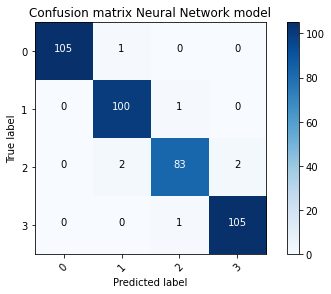

In [28]:
conf_matrix_nn = confusion_matrix(Y_test_price_range,predicted_price_range,labels = [0,1,2,3])
plt.figure()
plot_confusion_matrix(conf_matrix_linear, classes=['0','1','2','3'],normalize= False,  title='Confusion matrix Neural Network model')

A continuación se muestran el resto de metricas evaluadas también en el algoritmo SVM:

In [29]:
#Metricas Neural Network classification
print('Método Neural Network')
calculate_metrics(Y_test_price_range,predicted_price_range)

Método Neural Network
Accuracy: 0.9575
Precision: 0.9584
Recall: 0.9575
F1: 0.9575


## 6. Comparación de Maquinas de Vectores de Soporte y Redes de Neuronas

### 6.1 Comparación de metricas

En este apartado se compararan los resultados obtenidos por ambos métodos. En primer lugar, se destaca que para el método SVM se ha obtenido un mejor comportamiento utilizando el kernel lineal. Por tanto, se compararán los resultados obtenidos por el método SVM con kernel lineal con los obtenidos con el modelo de redes neuronales generado.
En cuanto al SVM, con una división simple del dataset se han obtenido las siguientes métricas:
- Accuracy: 0.9825
- Precision:0.9826
- Recall: 0.9825
- F1: 0.9825  

Hay que destacar que en el caso de utilizar validación cruzada para la divisón y entrenamiento del modelo, la accuracy media obtenida era ligeramente menor, concretamente de 0.975.  
En el caso del modelo de redes neuronales, las metricas obtenidas han sido las siguientes:
- Accuracy: 0.9575 
- Precision: 0.9584
- Recall: 0.9575 
- F1: 0.9575 

Por tanto, en vista de las metricas obtenidas <b>podemos determinar que el modelo con SVM funciona ligeramente mejor que el modelo implementado con redes neuronales para este conjunto de datos</b>.

### 6.2 Evaluación de overfitting

Por otro lado, se comparará tambien la presencia de overfitting en el modelo entrenado. Para ello se evaluará la accuracy tanto del entrenamiento como del test para ambos métodos. En caso de no presentar overfitting, la accuracy obtenida por el dataset de entrenamiento debería ser similar a la del test

In [34]:
print('SVM:')
# Imprimir accuracy de entrenamiento con SVM
SVM_training_pred = svm_linear.predict(X_train)
SVM_training_acc = accuracy_score(Y_train, SVM_training_pred)
print('Training Accuracy: {:.3f}'.format(SVM_training_acc))
# Imprimir accuracy de test con SVM
SVM_test_acc = accuracy_score(Y_test, yhat_linear)
print('Test Accuracy: {:.3f}'.format(SVM_test_acc))
print('----------------------------')
print('Redes de neuronas:')
# Imprimir accuracy de entreamiento con Redes de Neuronas
NN_training_pred = model_nn.predict(X_train1)
 # Deshacemos el one hot encoding
Y_train_price_range = []
NN_training_pred2 = []
for i in range(len(Y_train1)):
    Y_train_price_range.append(np.argmax(Y_train1[i]))
    NN_training_pred2.append(np.argmax(NN_training_pred[i]))
NN_training_acc = accuracy_score(Y_train_price_range,NN_training_pred2)
print('Training Accuracy: {:.3f}'.format(NN_training_acc))
# Imprimir accuracy de test con Redes de Neuronas
NN_test_acc = accuracy_score(Y_test_price_range,predicted_price_range)
print('Test Accuracy: {:.3f}'.format(NN_test_acc))

SVM:
Training Accuracy: 0.989
Test Accuracy: 0.983
----------------------------
Redes de neuronas:
Training Accuracy: 0.983
Test Accuracy: 0.958


Puede verse como en el caso de SVM presenta una <b> accuracy de entrenamiento de 0.988 </b> y una <b>accuracy de test de 0.983</b>. Por tanto al no haber practicamente diferencia podemos considerar que el modelo entrenado no presenta overfitting.  
En el caso del modelo de redes de neuronas se ha obtenido una <b> accuracy de entrenamiento de 0.983 </b> y una <b>accuracy de test de 0.958</b>, lo cual significa que el modelo entrenado presenta un ligero overfitting ya que aunque hay diferencia entre los valores, esta no es muy elevada.


## 7. Ventajas y desventajas de Máquinas de Vectores de Soporte

En primer lugar, en cuando a las <b>ventajas</b> de las SVM se puede destacar que sirven tanto para problemas de clasificación como de predicción. Además, se ven poco afectadas por datos ruidosos y no suelen caer en problemas de sobreajuste.  
Por otro lado, respecto a los <b>inconvenientes</b> destaca sobre todo la necesidad de probar diferentes combinaciones de kernel y parámetros para obtener un buen modelo. Otro inconveniente es el tiempo de entrenamiento, el cual es largo si se utilizan grandes cantidades de datos. Un último inconveniente es que se trata de un modelo de caja negra, en el cual es muy complicado interpretar los resultados obtenidos.

## 8. Ventajas y desventajas de Redes de Neuronas

En cuanto las <b>ventajas</b> de las redes de neuronas, destaca en primer lugar su versatilidad ya que se utilizan tanto en problemas de clasificación, predicción numérica e incluso aprendizaje no supervisado. Además son uno de los modelos con mayor precisión hoy en día.  
Respecto a los <b>inconvenientes</b> de las redes de neuronas, destaca el alto coste computacional para entrenarlas, sobre todo si la topología de la red es compleja. Otro inconveniente es que tienden a hacer underfit u overfit en los datos de entrenamiento. Por último, se tratan de un modelo de caja negra donde es muy complicado interpretar el resultado.

## 9. Conclusiones

En esta actividad se han aplicado dos modelos diferentes para realizar un problema de clasificación multiclase en diferentes rangos de precio de venta de telefonos moviles. Como se ha podido ver, se han obtenido muy buenos resultados utilizando tanto SVM como redes de neuronas, aunque los resultados del SVM han superado ligeramente al de redes de neuronas. Aun así, es muy probable que el modelo de redes de neuronas se pueda mejorar mediante la variación de sus parámetros y arquitectura de la red.